# 차원 축소

많은 경우 훈련 샘플 각각이 수천 심지어 수백만 개의 특성을 가지고 있다. 이런 많은 특성은 훈련을 느리게 할 뿐만 아니라, 좋은 솔루션을 찾기 어렵게 만드는데 이런 문제를 **차원의 저주**라고 한다.

훈련 속도를 높이는 것 외에 차원 축소는 데이터 시각화에도 유용하다. 차원 수를 둘로 줄이면 고차원 훈련 세트를 하나의 압축된 그래프로 그릴 수 있고, 군집 같은 시각적인 패턴을 감지해 중요한 통찰을 얻는 경우가 있다.

# 1. 차원 축소를 위한 접근 방법

## 1.1 투영

대부분의 실전 문제에서는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않다. 많은 특성은 거의 변화가 없는 반면, 다른 특성들은 서로 강하게 연관되어 있다. 결과적으로 모든 훈련 샘플이 고차원 공간 안의 저차원 부분 공간에 놓여 있다.

## 1.2 매니폴드 학습

# 2. PCA

**주성분 분석(Principal Component Analysis, PCA)** 은 데이터에 가장 가까운 초평면을 정의한 다음 데이터를 이 평면에 투영시킨다.

## 2.1 분산 보존

저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 한다.

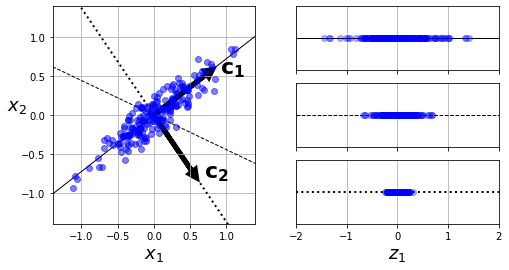

In [5]:
import numpy as np
import matplotlib.pyplot as plt

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

위 그림의 왼쪽 그래프는 간단한 2D 데이터셋이 세 개의 축(즉, 1차원 초평면)과 함께 표현되어 있다. 오른쪽 그래프는 데이터셋이 각 축에 투영된 결과이다.  
여기서 볼 수 있듯이 실선에 투영된 것은 분산을 최대로 보존하는 반면, 점선에 투영된 것은 분산을 매우 적게 유지하고 있다.

다른 방향으로 투영하는 것보다 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적으로 보인다. 이 선택을 다른 방식으로 설명하면 원본 데이터셋과 투영된 것 사이의 평귭 제곱 거리를 최소화하는 축이다.

## 2.2 주성분

PCA는 훈련 세트에서 분산이 최대인 축을 찾는다. 또한 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾는다. 고차원 데이터셋이라면 PCA는 이전의 두 축에 직교하는 세 번째 축을 찾으며 데이터셋에 있는 차원의 수만큼 네 번째, 다섯 번째, ... n번째 축을 찾는다. 이 때 i번째 축을 이 데이터의 i번째 **주성분**이라고 부른다.

특잇값 분해(Singular Value Decomposition, SVD)를 통해 훈련 세트의 주성분을 찾을 수 있다. 훈련 세트 행렬 $X$를 세 개의 행렬의 행렬 곱셉인$U\Sigma V^T$로 분해할 수 있다. 여기서 찾고자 하는 모든 주성분의 단위 벡터가 $V$에 아래와 같이 담겨 있다.
$$V=\begin{pmatrix} |&|&| \\ c_1 & c_2 & c_3 \\ |&|&| \end{pmatrix}$$

In [6]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [10]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:0]
c2 = Vt.T[:,1]

## 2.3 d차원으로 투영하기

주성분을 모두 추출해냈다면 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소시킬 수 있다. 이 초평면은 분산을 가능한 한 최대로 보존하는 투영임을 보장한다.

초평면에 훈련 세트를 투영하고 d차원으로 축소된 데이터셋 $X^{d-proj}$를 얻기 위해서는 행렬 $X$와 $V$의 첫d열로 구성된 행렬 $W_d$를 행렬 곱셈하면 된다.
$$X_{d-proj}=XW_d$$

In [12]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

## 2.4 사이킷런 사용하기

In [13]:
# 사이킷런으로 PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [14]:
print(X.shape, X2D.shape)

(60, 3) (60, 2)


## 2.5 설명된 분산의 비율

explained_variance_ratio_ 변수에 저장된 주성분의 **설명된 분산의 비율**도 유용한 정보 중 하나이다. 이 비율은 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타낸다.

In [15]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

이는 데이터셋 분산의 84.2%가 첫 번째 PC를 따라 놓여 있고 14.6%가 두 번째 PC를 따라 놓여 있음을 알려준다.

## 2.6 적절한 차원 수 선택하기

축소할 차원 수를 임의로 정하기보다는 충분한 분산(예를 들어 95%)이 될 떄까지 더해야 할 차원 수를 선택하는 것이 간단하다.

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

## 2.7 압축을 위한 PCA

압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 원래의 차원으로 되돌릴 수도 있다. 투영에서 일정량의 정보를 잃어버렸기 때문에 이렇게 해도 원본 데이터셋을 얻을 수는 없지만 원본 데이터와 매우 비슷할 것이다. 이런 원본 데이터와 재구성된 데이터 사이의 평균 제곱 거리를 **재구성 오차**라고 한다.

In [17]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [18]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [20]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

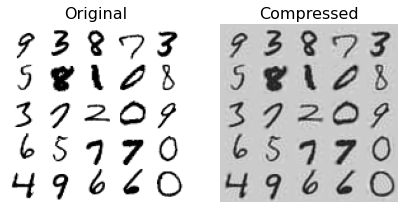

In [22]:
import matplotlib as mpl

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

plt.show()

## 2.8 랜덤 PCA

svd_solver 매개변수를 *randomized*로 지정하면 사이킷런은 랜덤 PCA라 부르는 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근사값을 빠르게 찾는다.

이 알고리즘의 계산복잡도는 와전한 SVD 방식인 $O(m\times n^2) + O(n^3)$이 아니라 $O(m\times d^2) + O(d^3)$이다. 따라서 d가 n보다 많이 작으며 완전 SVD보다 훨씬 빠르다.

In [23]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

svd_solver의 기본 값은 *auto*이고, m이나 n이 500보다 크고 d가 m이나 n의 80% 보다 작으면 사이킷런은 자동으로 랜덤 PCA를 사용한다.

## 2.9 점진적 PCA

PCA 구현의 문제는 SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다는 것이다. **점진적 PCA** 알고리즘은 훈려 ㄴ세트를 미니 배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입한다. 이런 방식은 훈련 세트가 클 때 유용하고 온라인으로 PCA를 적용할 수 있다.

In [24]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduce = inc_pca.transform(X_train)

# 3. LLE

**지역 선형 임베딩(Locally Linear Embedding, LLE)** 은 또 다른 강력한 비선형 차원 축소 기술이다. 이전 알고리즘처럼 투영에 의존하지 않는 매니폴드 학습이다. 간단히 말해 LLE는 먼저 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정한다. 그런 다음 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다. 이 방법은 특히 잡음이 너무 많지 않은 경우 꼬인 매니폴드를 펼치는데 잘 작동한다.

In [32]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

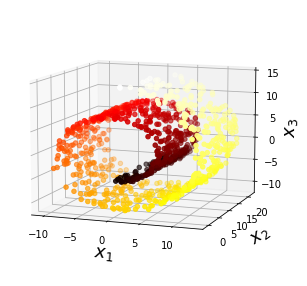

In [34]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [33]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

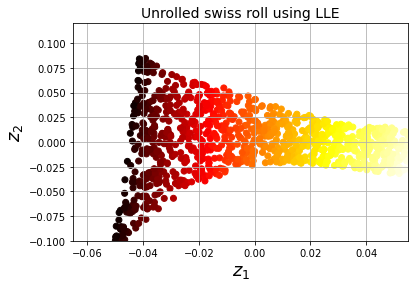

In [35]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

LLE가 작동하는 방식은 다음과 같다.
1. 알고리즘이 각 훈련 샘플 $x^{(i)}$에 대해 가장 가까운 k개의 샘플을 찾는다(*n_neighbors*).
2. 이 이웃에 대한 선형 함수로 $x^{(i)}$를 재구성한다. 구체적으로 말하면 $x^{(i)}$와 $\sum_{j=1}^m w_{i,j}X^{j}$사이의 제곱 거리가 최소가 되는 $W_{i,j}$를 찾는 것이다.
    * 여기서 $x^{(j)}$가 $x^{(i)}$의 가장 가까운 k개 이웃 중 하나가 아닐 경우에는 $w_{i,j}=0$이 된다.

$$\hat{W}=argmin \sum_{i=1}^m \left( x^{(i)} - \sum_{j=1}^m w_{i,j}x^{(j)} \right)^2$$
$$\begin{cases}
w_{i,j}=0, & x^{(i)}가 x^{(j)}\text{의 최근접 이웃 k개 중 하나가 아닐 때} \\
\sum_{j=1}^m w_{i,j}=1, & i=1, 2, 3,\cdots,m\text{일 때}
\end{cases}$$

# 4. 다른 차원 축소 기법

* 랜덤 투영
    * 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영
* 다차원 스케일링
    * 샘플 간의 거리를 보존하면서 차원을 축소
* lsomap
    * 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만들고, 그런 다음 샘플 간의 geodesic distance를 유지하면서 차원을 축소
* t-SNE
    * 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소
* LDA
    * 분류 알고리즘이지만 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습하여 이 축을 데이터가 투영되는 초평면을 정의하는데 사용